# Code implementing **DeepFace** tensorflow, training epochs on the CS550 dataset.

In [ ]:
from google.colab import files

# Use the 'files.upload()' function to upload your dataset
uploaded = files.upload()

# Provide the file path to the uploaded dataset
file_path = '/content/' + list(uploaded.keys())[0]

# You can verify the file is uploaded using the following line
print("Uploaded file:", file_path)

Saving data_set_train.zip to data_set_train.zip
Uploaded file: /content/data_set_train.zip


In [ ]:
# !pip install deepface tensorflow kaggle
import zipfile

# Specify the path to the uploaded ZIP file
zip_file_path = '/content/' + list(uploaded.keys())[0]

# Specify the directory where you want to extract the contents
extracted_dir_path = '/content/my_dataset/'

# Create the target directory if it doesn't exist
import os
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the ZIP file to the target directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir_path)
print("Extracted files:", extracted_files)

Extracted files: ['__MACOSX', 'data_set_train']


In [ ]:
!pip install tensorflow

# Model Training and Saving the Model

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define data augmentation and preprocessing for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define data augmentation and preprocessing for the validation dataset
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Define base path and other parameters
base_path = "/content/my_dataset/data_set_train"
batch_size = 1
num_epochs = 15
validation_split = 0.1

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Load and preprocess the validation data
validation_generator = val_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

# Load pre-trained VGGFace model (without top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers for face recognition
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)  # Adjust the number of units as needed
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model with appropriate loss and optimizer
model.compile(optimizer=Adam(learning_rate=0.000002), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on your dataset
model.fit(train_generator, validation_data=validation_generator, epochs=num_epochs)

# Save the trained model for future use
model.save('face_recognition_model.h5')

# Load your trained model
model = tf.keras.models.load_model('face_recognition_model.h5')  # Replace with the path to your model

####################################################-------------------------------------------------------




Found 85 images belonging to 14 classes.
Found 0 images belonging to 14 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/15
85/85 [==============================] - 18s 41ms/step - loss: 2.7938 - accuracy: 0.0706
Epoch 2/15
85/85 [==============================] - 3s 39ms/step - loss: 2.6078 - accuracy: 0.0941
Epoch 3/15
85/85 [==============================] - 3s 39ms/step - loss: 2.4622 - accuracy: 0.1647
Epoch 4/15
85/85 [==============================] - 4s 43ms/step - loss: 2.3259 - accuracy: 0.3176
Epoch 5/15
85/85 [==============================] - 3s 38ms/step - loss: 2.1005 - accuracy: 0.4118
Epoch 6/15
85/85 [==============================] - 3s 40ms/step - loss: 1.8666 - accuracy: 0.4824
Epoch 7/15
85/85 [==============================] - 3s 38ms/step - loss: 1.6115 - accuracy: 0.5412
Epoch 8/15
85/85 [==============================] - 3s 38ms/step - loss: 1.3056 - accuracy: 0.6588
Epoch 9/15
85/85 [==============================] - 3s 39ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Uploading the Test files

In [ ]:
from google.colab import files

# Use the 'files.upload()' function to upload your dataset
uploaded = files.upload()

# Provide the file path to the uploaded dataset
file_path = '/content/' + list(uploaded.keys())[0]

# You can verify the file is uploaded using the following line
print("Uploaded file:", file_path)

Saving test_final.zip to test_final.zip
Uploaded file: /content/test_final.zip


# Predicting through Test Sample

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model
model = tf.keras.models.load_model('face_recognition_model.h5')  # Replace with the path to your saved model

# Load an image you want to test
img_path = '/content/WhatsApp Image 2023-11-09 at 12.09.20 PM.jpeg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size to match your model's input size
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.  # Normalize the pixel values

# img

# Make a prediction on the image
predictions = model.predict(img)

# Get the class index with the highest probability
predicted_class_index = np.argmax(predictions)

# Map the class index to a person's name
# Replace 'class_indices' with the actual mapping used during training
class_indices = train_generator.class_indices  # Assuming you've defined this mapping during training
person_name = [k for k, v in class_indices.items() if v == predicted_class_index][0]

# Print the predicted person's name
print(f"Predicted person: {person_name}")


1/1 [==============================] - 0s 143ms/step
Predicted person: Aditya_Singh


In [ ]:
from google.colab import files

# Use the 'files.upload()' function to upload your dataset
uploaded = files.upload()

# Provide the file path to the uploaded dataset
file_path = '/content/' + list(uploaded.keys())[0]

# You can verify the file is uploaded using the following line
print("Uploaded file:", file_path)

Saving WhatsApp Image 2023-11-09 at 12.09.20 PM.jpeg to WhatsApp Image 2023-11-09 at 12.09.20 PM.jpeg
Uploaded file: /content/WhatsApp Image 2023-11-09 at 12.09.20 PM.jpeg


In [ ]:
# Extract images from the zip file
with zipfile.ZipFile('/content/test_final.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/test_images_folder')

# Using some more samples for testing


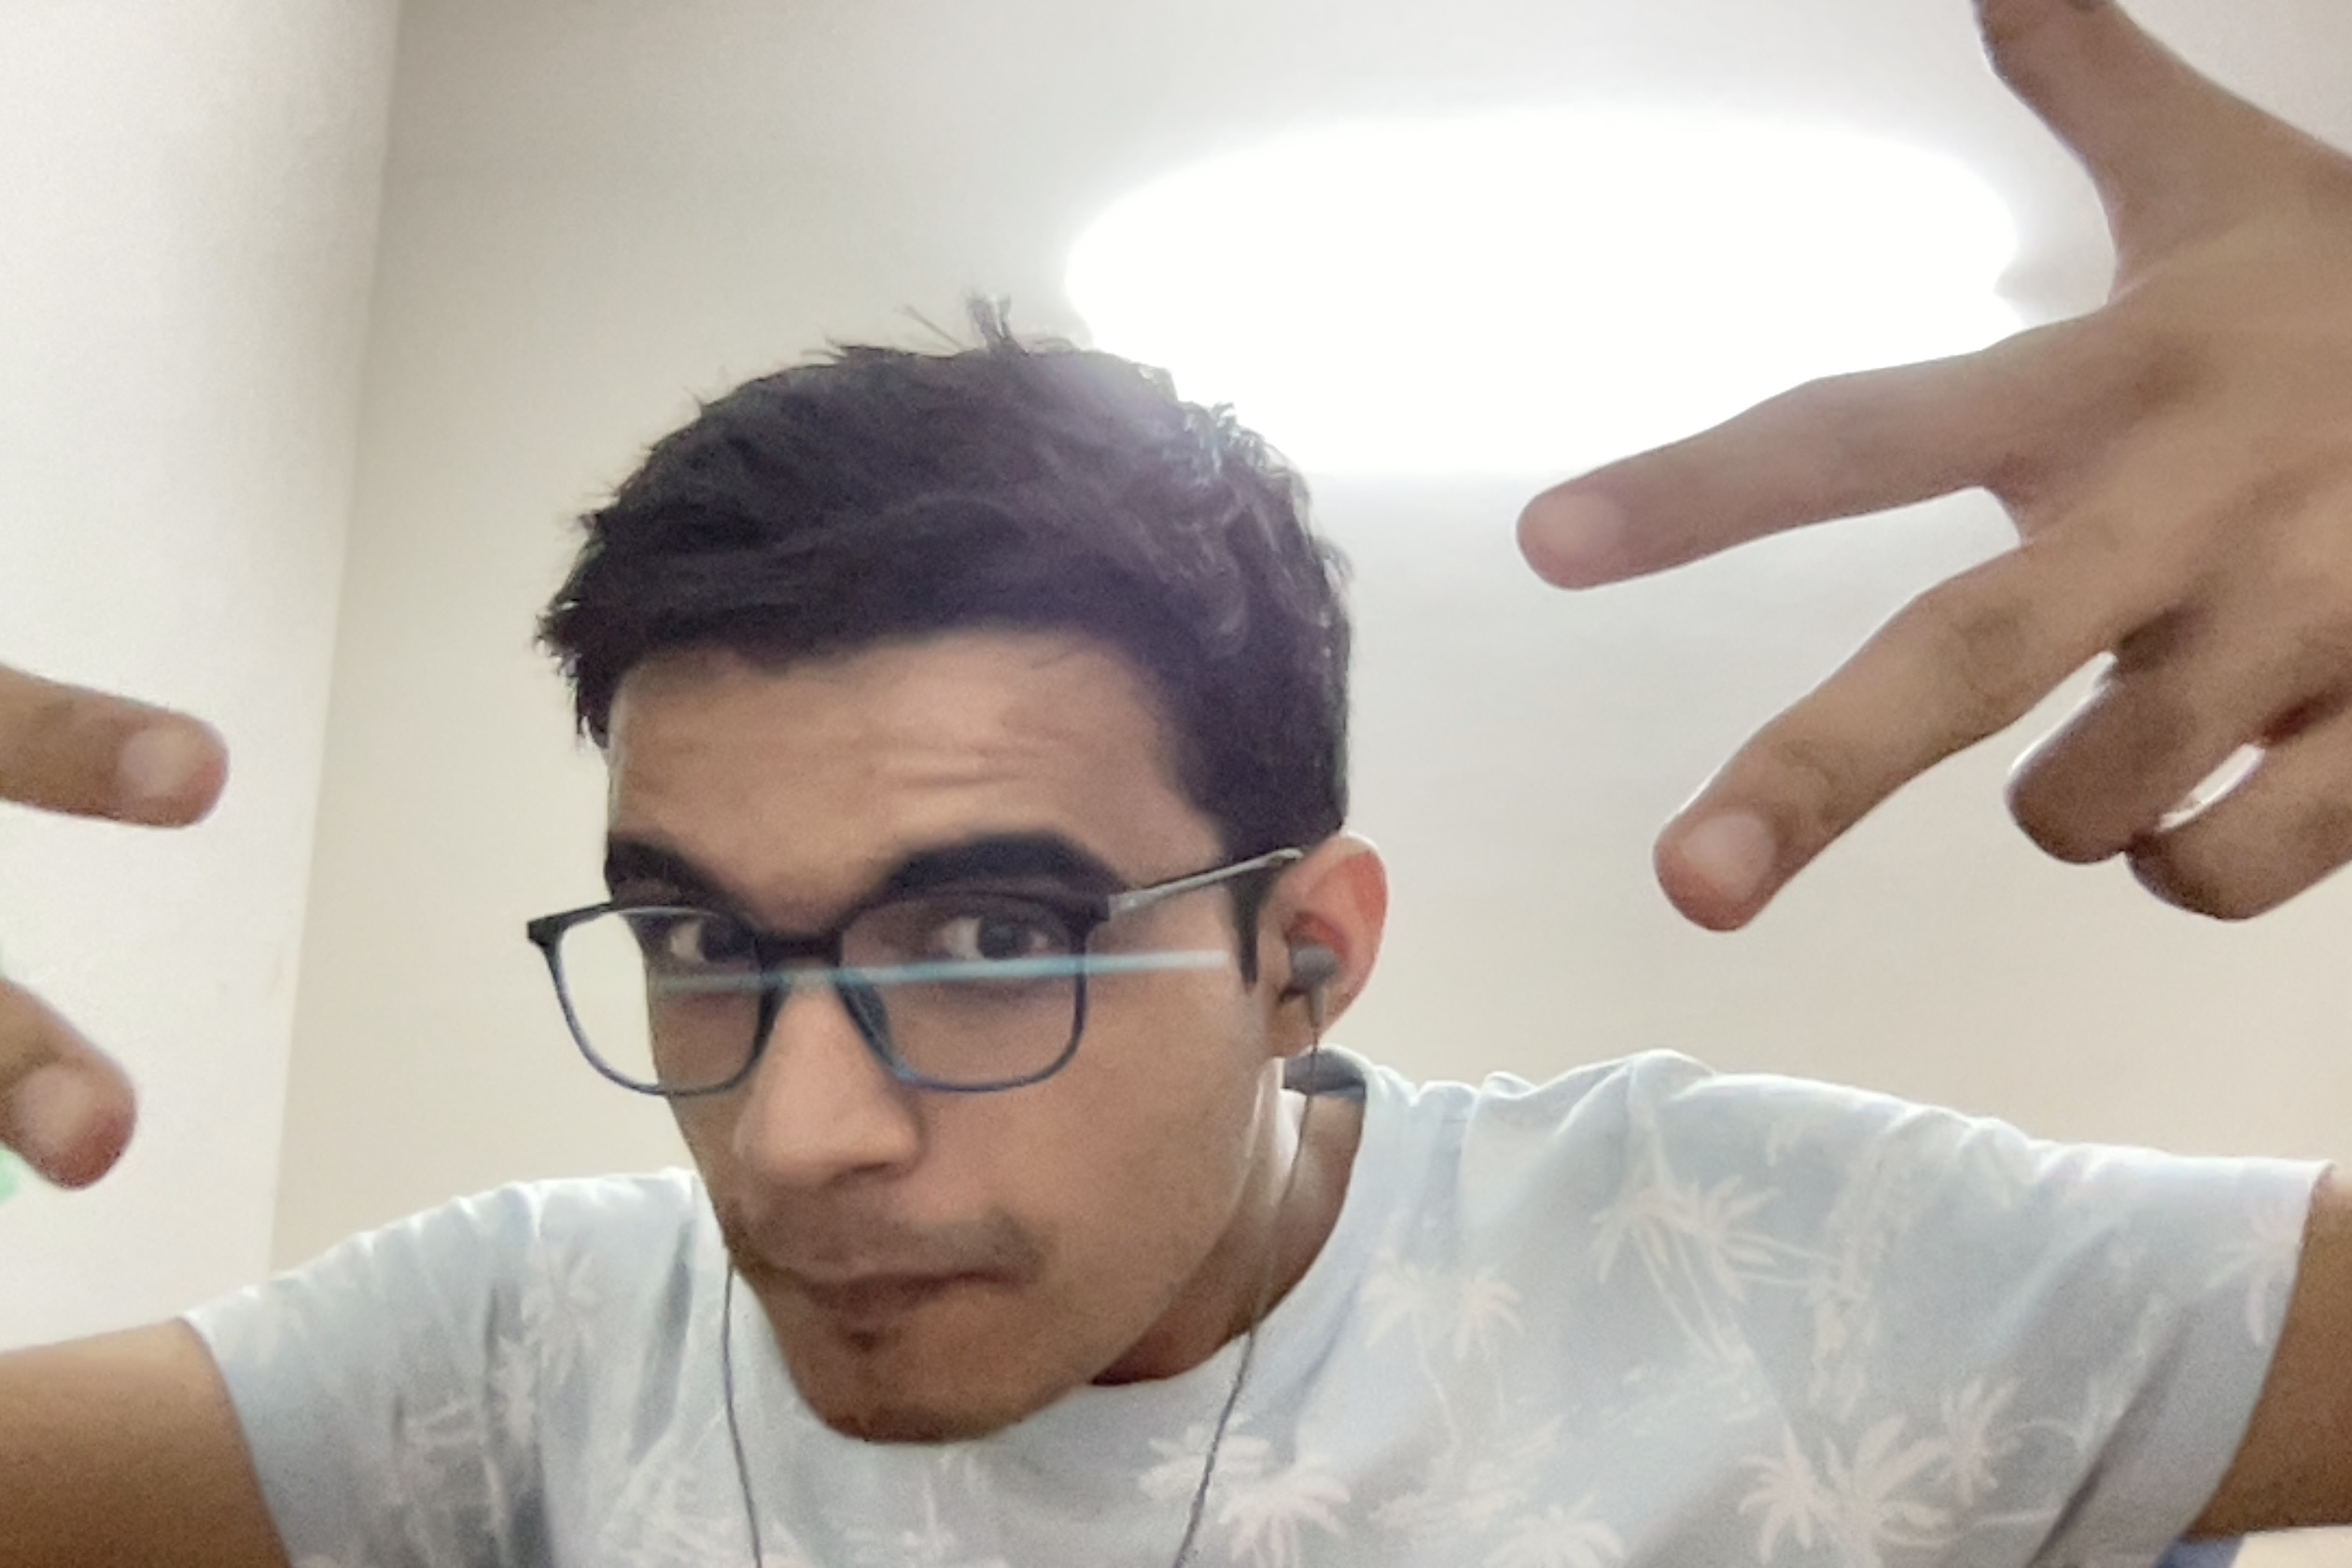

1/1 [==============================] - 0s 254ms/step
Predicted person for /content/test_images_folder/test_final/Abhishek3.jpg: Abhishek_Kumar
Probability for Abhishek_Kumar: 0.9486092925071716
Probability for Aditya_Dubey: 0.003082327777519822
Probability for Aditya_Singh: 0.0004972689202986658
Probability for Aditya_Tiwari: 0.0001408428797731176
Probability for Arnav_Gautam: 1.470468760089716e-05
Probability for Chirovolu_Nikhil: 4.8032110498752445e-05
Probability for Dhruv_Saini: 0.0038889730349183083
Probability for J_V_Aditya: 0.001158354221843183
Probability for Karan_Khumbar: 0.00440575834363699
Probability for Kunal_Singla: 0.0326983816921711
Probability for Lalit_gaur: 0.004839881788939238
Probability for Omm_Prakash_Sahoo: 0.00021150361862964928
Probability for Satyam_Sangwan: 0.0002395573683315888
Probability for Vinayak_Kesarwani: 0.0001650380581850186


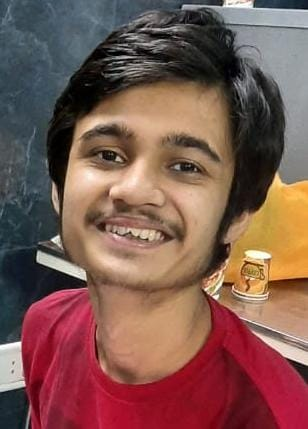

1/1 [==============================] - 0s 39ms/step
Predicted person for /content/test_images_folder/test_final/Aditya_Tivari_Test.jpeg: Kunal_Singla
Probability for Abhishek_Kumar: 2.8861750251962803e-05
Probability for Aditya_Dubey: 0.21009622514247894
Probability for Aditya_Singh: 0.21567539870738983
Probability for Aditya_Tiwari: 0.0002935004886239767
Probability for Arnav_Gautam: 1.232040722243255e-05
Probability for Chirovolu_Nikhil: 0.00015253646415658295
Probability for Dhruv_Saini: 0.00040870715747587383
Probability for J_V_Aditya: 0.0001353207480860874
Probability for Karan_Khumbar: 0.000659177778288722
Probability for Kunal_Singla: 0.5704624652862549
Probability for Lalit_gaur: 0.0005678042070940137
Probability for Omm_Prakash_Sahoo: 0.00032553603523410857
Probability for Satyam_Sangwan: 0.001176941324956715
Probability for Vinayak_Kesarwani: 5.202837201068178e-06


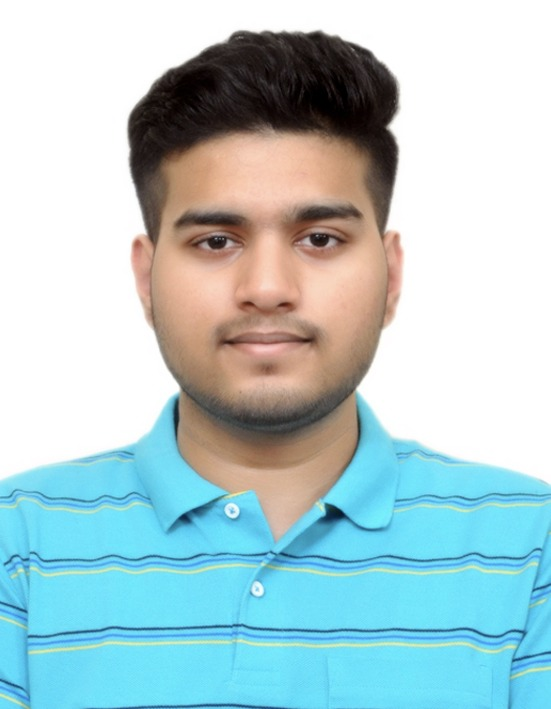

1/1 [==============================] - 0s 39ms/step
Predicted person for /content/test_images_folder/test_final/Arnav.jpeg: Dhruv_Saini
Probability for Abhishek_Kumar: 0.001462894375436008
Probability for Aditya_Dubey: 0.03564535081386566
Probability for Aditya_Singh: 0.001563550904393196
Probability for Aditya_Tiwari: 0.0015386469895020127
Probability for Arnav_Gautam: 0.00022380250447895378
Probability for Chirovolu_Nikhil: 0.0034925490617752075
Probability for Dhruv_Saini: 0.8861643671989441
Probability for J_V_Aditya: 0.0308282058686018
Probability for Karan_Khumbar: 0.0015947321662679315
Probability for Kunal_Singla: 0.011011993512511253
Probability for Lalit_gaur: 0.0011240600142627954
Probability for Omm_Prakash_Sahoo: 0.013214989565312862
Probability for Satyam_Sangwan: 0.007049574051052332
Probability for Vinayak_Kesarwani: 0.005085262004286051


UnidentifiedImageError: ignored

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import zipfile
import os

# Load your trained model
model = tf.keras.models.load_model('face_recognition_model.h5')  # Replace with the path to your saved model

# Get a list of image file paths
image_folder = '/content/test_images_folder/test_final'
image_paths = [f'{image_folder}/{img}' for img in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, img))]

# print(image_paths)

# Iterate through each image for testing
for img_path in image_paths:
    # Open and display the image
    img = image.load_img(img_path)
    display(img)

    # Preprocess the image for prediction
    img = img.resize((224, 224))  # Adjust the size if needed
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.  # Normalize the pixel values

    # Make a prediction on the image
    predictions = model.predict(img)

    # Get the class index with the highest probability
    predicted_class_index = np.argmax(predictions)

    # Get the predicted probabilities for each class
    predicted_probabilities = predictions[0]

    # Map the class index to a person's name
    # Replace 'class_indices' with the actual mapping used during training
    class_indices = train_generator.class_indices  # Assuming you've defined this mapping during training
    person_name = [k for k, v in class_indices.items() if v == predicted_class_index][0]

    # Print the predicted person's name and associated probabilities
    print(f"Predicted person for {img_path}: {person_name}")
    for i, prob in enumerate(predicted_probabilities):
        class_name = [k for k, v in class_indices.items() if v == i][0]
        print(f"Probability for {class_name}: {prob}")
